# Import Dependencies

In [2]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
import numpy as np
from sodapy import Socrata
from config import my_app_token, key_id, key_secret
from scipy.stats import linregress

# Data Retrieval

In [4]:
# Mobility data retrieval
client = Socrata("data.bts.gov",
                 my_app_token,
                 username=key_id,
                 password=key_secret)

# Results returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("w96p-f2qv", limit=2028190)

# Convert to pandas DataFrame
mobility_df = pd.DataFrame.from_records(results)
mobility_df.head(5)

,level,date,state_fips,state_code,county_fips,county,pop_stay_at_home,pop_not_stay_at_home,trips,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500
0,County,2020-10-03T00:00:00.000,01,AL,01001,Autauga County,10920.0,44681.0,159472.0,32341.0,38888.0,25231.0,25128.0,26034.0,7052.0,3108.0,1497.0,172.0,21.0
1,County,2020-10-02T00:00:00.000,01,AL,01001,Autauga County,9857.0,45744.0,179089.0,40822.0,43890.0,21287.0,27059.0,34514.0,7472.0,2505.0,1223.0,295.0,22.0
2,County,2020-10-01T00:00:00.000,01,AL,01001,Autauga County,9073.0,46528.0,169030.0,33225.0,40020.0,24366.0,23596.0,34141.0,8671.0,3614.0,1044.0,339.0,14.0
3,County,2020-09-30T00:00:00.000,01,AL,01001,Autauga County,11044.0,44557.0,163850.0,30293.0,40399.0,21267.0,23737.0,34307.0,9107.0,3409.0,1265.0,51.0,15.0
4,County,2020-09-29T00:00:00.000,01,AL,01001,Autauga County,9830.0,45771.0,159342.0,32922.0,34968.0,21025.0,22947.0,34139.0,8155.0,4053.0,1029.0,92.0,12.0


In [13]:
mobility_national_df = mobility_df.loc[mobility_df["level"]=="National"]
mobility_national_df

,level,date,state_fips,state_code,county_fips,county,pop_stay_at_home,pop_not_stay_at_home,trips,trips_1,trips_1_3,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500
2017164,National,2020-10-03,NaN,NaN,NaN,NaN,87024735.0,240142699.0,927183815.0,211617611.0,232870469.0,115875992.0,145425969.0,140020416.0,50670372.0,20819646.0,8108259.0,1343768.0,431313.0
2017165,National,2020-10-02,NaN,NaN,NaN,NaN,81290696.0,245876738.0,953667329.0,219778936.0,236310969.0,116949997.0,148313576.0,148165072.0,53055640.0,20140558.0,8977193.0,1526787.0,448601.0
2017166,National,2020-10-01,NaN,NaN,NaN,NaN,78207847.0,248959587.0,980903679.0,226984925.0,240444739.0,118521687.0,152043542.0,155346740.0,56887813.0,20789322.0,7766759.0,1553225.0,564927.0
2017167,National,2020-09-30,NaN,NaN,NaN,NaN,81311288.0,245856146.0,960570145.0,214510233.0,233776415.0,114987264.0,150087375.0,157651050.0,59215854.0,21517219.0,7002568.0,1380441.0,441726.0
2017168,National,2020-09-29,NaN,NaN,NaN,NaN,81461516.0,245705918.0,949508146.0,215547734.0,231333469.0,113996233.0,147923891.0,154541720.0,57300069.0,20240505.0,6822888.0,1365973.0,435664.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017801,National,2019-01-05,NaN,NaN,NaN,NaN,64389745.0,261777675.0,1180476620.0,295459014.0,304168709.0,148540651.0,180941769.0,165239790.0,54842134.0,19363939.0,8490791.0,1991159.0,1438664.0
2017802,National,2019-01-04,NaN,NaN,NaN,NaN,61803652.0,264363768.0,1181953829.0,293159631.0,295643296.0,145251819.0,181324645.0,176144493.0,58761592.0,19315785.0,8687318.0,2096065.0,1569185.0
2017803,National,2019-01-03,NaN,NaN,NaN,NaN,63050480.0,263116940.0,1162752684.0,296375014.0,290074425.0,140771581.0,175775410.0,172027487.0,57632422.0,18366626.0,8124548.0,2038099.0,1567072.0
2017804,National,2019-01-02,NaN,NaN,NaN,NaN,61305201.0,264862219.0,1139452281.0,291276735.0,285887315.0,138039296.0,171637514.0,167412698.0,56148976.0,17739183.0,7817044.0,1962301.0,1531219.0


# Data Retrieval -second part

In [7]:
# Set the national-level covid data file path
covid_data_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"

# Read the national-level covid data from csv file into DataFrame
covid_df = pd.read_csv(covid_data_url)
covid_df

,date,cases,deaths
0,2020-01-21,1,0
1,2020-01-22,1,0
2,2020-01-23,1,0
3,2020-01-24,2,0
4,2020-01-25,3,0
...,...,...,...
263,2020-10-10,7749859,214187
264,2020-10-11,7794625,214606
265,2020-10-12,7840546,214957
266,2020-10-13,7895064,215783


# Data Cleanup
*cleaned data by dropping raws and converting date to better format. 


In [8]:
# Remove NaNs from the Dataset
print(len(covid_df))
covid_df = covid_df.dropna(how="any")
print(len(covid_df))

268
268


In [47]:
# Convert "date" column to "datetime64" datatype
mobility_national_df['date'] = pd.to_datetime(mobility_df['date']) 
mobility_national_df.dtypes

C:\Users\reiki\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


level                           object
date                    datetime64[ns]
state_fips                      object
state_code                      object
county_fips                     object
county                          object
pop_stay_at_home                object
pop_not_stay_at_home            object
trips                           object
trips_1                         object
trips_1_3                       object
trips_3_5                       object
trips_5_10                      object
trips_10_25                     object
trips_25_50                     object
trips_50_100                    object
trips_100_250                   object
trips_250_500                   object
trips_500                       object
dtype: object

In [10]:
# Convert "date" column to "datetime64" datatype
covid_df['date'] = pd.to_datetime(covid_df['date']) 
covid_df.dtypes

date      datetime64[ns]
cases              int64
deaths             int64
dtype: object

# Merge Mobility and COVID Data
* merged data for date column for both eata sets

In [15]:
# Merge the dataframes
merged_df = pd.merge(mobility_national_df, covid_df, on=["date"], how="inner")
merged_df

,level,date,state_fips,state_code,county_fips,county,pop_stay_at_home,pop_not_stay_at_home,trips,trips_1,...,trips_3_5,trips_5_10,trips_10_25,trips_25_50,trips_50_100,trips_100_250,trips_250_500,trips_500,cases,deaths
0,National,2020-10-03,NaN,NaN,NaN,NaN,87024735.0,240142699.0,927183815.0,211617611.0,...,115875992.0,145425969.0,140020416.0,50670372.0,20819646.0,8108259.0,1343768.0,431313.0,7410342,209273
1,National,2020-10-02,NaN,NaN,NaN,NaN,81290696.0,245876738.0,953667329.0,219778936.0,...,116949997.0,148313576.0,148165072.0,53055640.0,20140558.0,8977193.0,1526787.0,448601.0,7362563,208564
2,National,2020-10-01,NaN,NaN,NaN,NaN,78207847.0,248959587.0,980903679.0,226984925.0,...,118521687.0,152043542.0,155346740.0,56887813.0,20789322.0,7766759.0,1553225.0,564927.0,7309152,207699
3,National,2020-09-30,NaN,NaN,NaN,NaN,81311288.0,245856146.0,960570145.0,214510233.0,...,114987264.0,150087375.0,157651050.0,59215854.0,21517219.0,7002568.0,1380441.0,441726.0,7262734,206852
4,National,2020-09-29,NaN,NaN,NaN,NaN,81461516.0,245705918.0,949508146.0,215547734.0,...,113996233.0,147923891.0,154541720.0,57300069.0,20240505.0,6822888.0,1365973.0,435664.0,7220676,205878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,National,2020-01-25,NaN,NaN,NaN,NaN,69129409.0,258038025.0,1188078124.0,298647657.0,...,149599498.0,183206532.0,167957623.0,54894428.0,18885702.0,7058860.0,1261738.0,697318.0,3,0
253,National,2020-01-24,NaN,NaN,NaN,NaN,62012426.0,265155008.0,1295518515.0,332412401.0,...,158540090.0,196778131.0,190272499.0,61965935.0,19138800.0,7554973.0,1447306.0,745573.0,2,0
254,National,2020-01-23,NaN,NaN,NaN,NaN,63631506.0,263535928.0,1230534034.0,317684064.0,...,148399442.0,186143106.0,184428396.0,61157374.0,18007879.0,6552188.0,1404941.0,758786.0,1,0
255,National,2020-01-22,NaN,NaN,NaN,NaN,62367536.0,264799898.0,1223732200.0,311554316.0,...,148986115.0,187375090.0,184801441.0,60858119.0,17493536.0,6113405.0,1265318.0,667803.0,1,0


In [16]:
# Include only the columns required
merged_df = merged_df[["date",
                       "pop_stay_at_home",
                       "pop_not_stay_at_home", 
                       "cases",
                       "deaths"]]
merged_df

,date,pop_stay_at_home,pop_not_stay_at_home,cases,deaths
0,2020-10-03,87024735.0,240142699.0,7410342,209273
1,2020-10-02,81290696.0,245876738.0,7362563,208564
2,2020-10-01,78207847.0,248959587.0,7309152,207699
3,2020-09-30,81311288.0,245856146.0,7262734,206852
4,2020-09-29,81461516.0,245705918.0,7220676,205878
...,...,...,...,...,...
252,2020-01-25,69129409.0,258038025.0,3,0
253,2020-01-24,62012426.0,265155008.0,2,0
254,2020-01-23,63631506.0,263535928.0,1,0
255,2020-01-22,62367536.0,264799898.0,1,0


In [17]:
# Remove NaNs from the Dataset
print(len(merged_df))
merged_df = merged_df.dropna(how="any")
print(len(merged_df))

257
257


In [19]:
merged_df.dtypes

date                    datetime64[ns]
pop_stay_at_home                object
pop_not_stay_at_home            object
cases                            int64
deaths                           int64
dtype: object

In [20]:
# Convert the population columns to int datatype
merged_df.loc[:,"pop_not_stay_at_home"] = merged_df.loc[:,"pop_not_stay_at_home"].astype(float).astype(int)
merged_df.loc[:,"pop_stay_at_home"] = merged_df.loc[:,"pop_stay_at_home"].astype(float).astype(int)
merged_df.dtypes

date                    datetime64[ns]
pop_stay_at_home                 int32
pop_not_stay_at_home             int32
cases                            int64
deaths                           int64
dtype: object

# Data Visualization

* Generate scatter plot and linear regression to see if there is correlation between population staying at home and covid cases/death
* Generate line plot to show the mobility/covid trend at national level

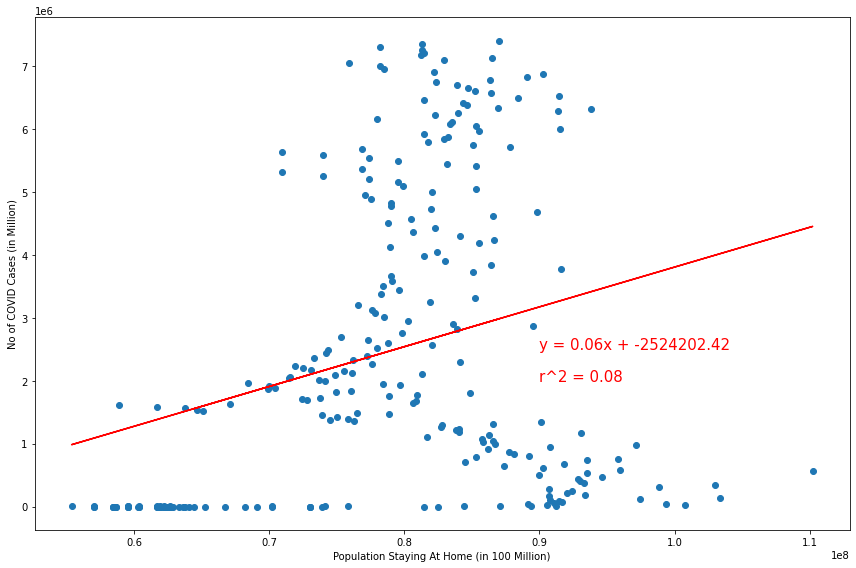

In [44]:
# Set plot size
plt.figure(figsize=(12,8))

# Set the x and y axis values
x_values = merged_df["pop_stay_at_home"]
y_values = merged_df["cases"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(90000000,2500000),fontsize=15,color="red")
plt.annotate(r_squared, (90000000,2000000),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Population Staying At Home (in 100 Million)')
plt.ylabel('No of COVID Cases (in Million)')

plt.tight_layout()
plot_file_path = os.path.join("Images","mobility_cases_scatterplot.png")
plt.savefig(plot_file_path)
plt.show()

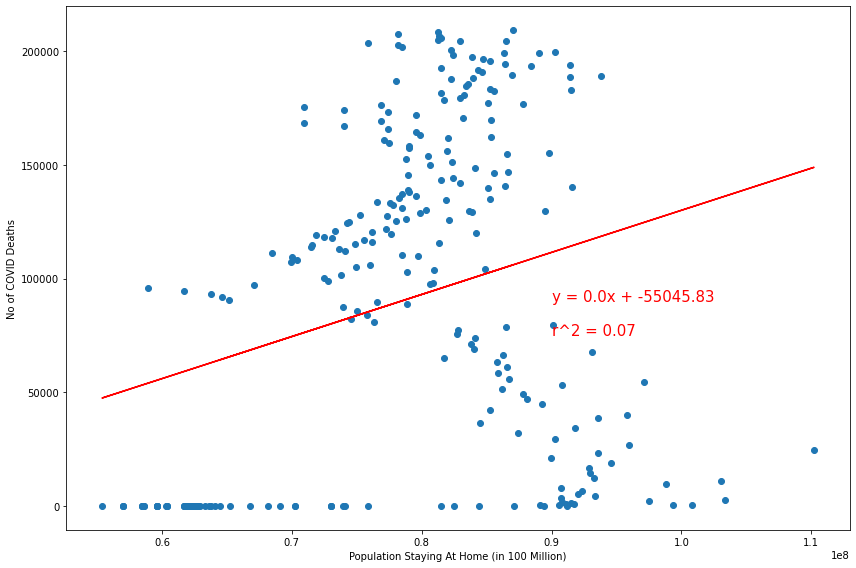

In [43]:
# Set plot size
plt.figure(figsize=(12,8))

# Set the x and y axis values
x_values = merged_df["pop_stay_at_home"]
y_values = merged_df["deaths"]

# Determine the regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Determine the line equation and r squared value
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
r_squared = f"r^2 = {round(rvalue ** 2,2)}"

# Generate the scatter plot with the linear regression line
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation and r squared
plt.annotate(line_eq,(90000000,90000),fontsize=15,color="red")
plt.annotate(r_squared, (90000000,75000),fontsize=15,color="red")

# Set the x and y labels
plt.xlabel('Population Staying At Home (in 100 Million)')
plt.ylabel('No of COVID Deaths')

plt.tight_layout()
plot_file_path = os.path.join("Images","mobility_death_scatterplot.png")
plt.savefig(plot_file_path)
plt.show()

In [45]:
# Extracting the first day of every month for plotting purpose
merged_mth_df = merged_df.groupby(pd.DatetimeIndex(merged_df.date).to_period('M')).nth(-1)
merged_mth_df

,date,pop_stay_at_home,pop_not_stay_at_home,cases,deaths
date,,,,,
2020-01,2020-01-21,64458818,262708616,1,0
2020-02,2020-02-01,66752030,260415404,8,0
2020-03,2020-03-01,70239950,256927484,88,3
2020-04,2020-04-01,92048676,235118758,215391,5325
2020-05,2020-05-01,81698374,245469060,1109726,64902
2020-06,2020-06-01,74950180,252217254,1821167,105112
2020-07,2020-07-01,75288661,251878773,2703218,128103
2020-08,2020-08-01,86581029,240586405,4628329,154914
2020-09,2020-09-01,83386029,243781405,6089504,184563


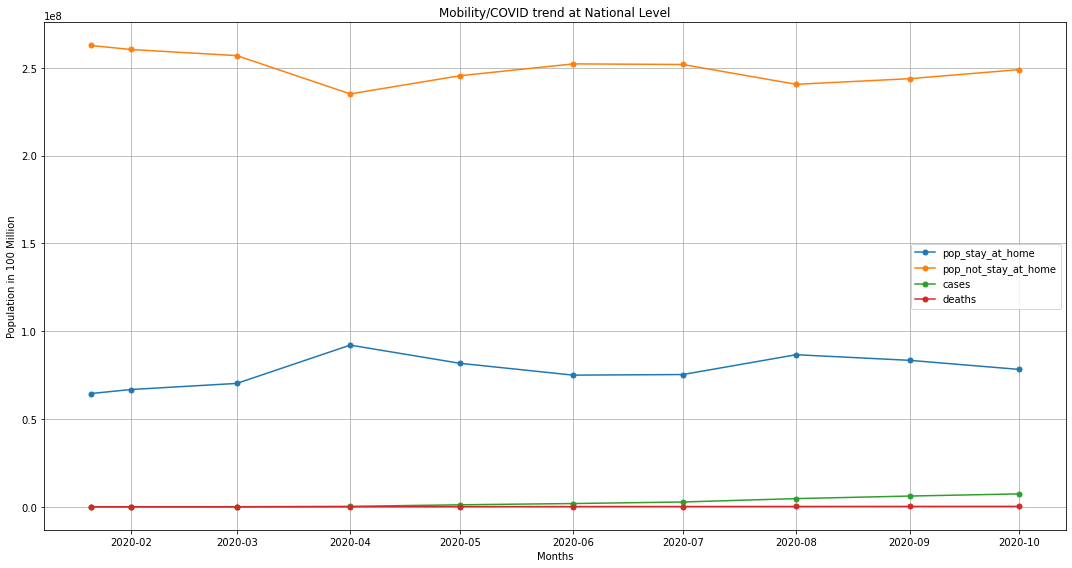

In [48]:
# Set plot size
plt.figure(figsize=(15,8))

# Generate line plot
for column_name in merged_mth_df.columns:
    if column_name != "date":
        plt.plot(merged_mth_df["date"],
                 merged_mth_df[column_name], 
                 marker = "o", 
                 markersize=5, 
                 label=column_name)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# Set title, x and y labels 
plt.xlabel("Months")
plt.ylabel("Population in 100 Million")
plt.title("Mobility/COVID trend at National Level")

# Add in a grid for the chart
plt.grid()

# Save and Display the line plot
plt.tight_layout()
mobility_line_file_path = os.path.join("Images","mobility_lineplot.png")
plt.savefig(mobility_line_file_path)
plt.show()

# Analysis Summary

## Scatter Plot

It could be observed from the below linear regression model that there isn't strong relationship between the Covid cases and mobility.(Relationship between mobillity and Covid cases has positive slope trend with R^2 = 0.08 = 8%. The relationship accounts for only 8% of the total variation) 

![Scatter plot](Images/mobility_cases_scatterplot.png)

## Line Plot

It could be observed from the below line plot that the population staying at home increased by 31% from March to April with many states going into total loackdown phase. From April to July the population staying at home decreased by 19% as many states entered into lockdown phase 2 and relaed some of the requirements of lockdown. After July we can see clearly from the image that population staying at home increased even without lockdown or state mendate in accordance with number of covid case increase.
![Line Plot](Images/mobility_lineplot.png)
